In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np


C:\Users\phoky\AppData\Local\Temp\ipykernel_7260\2340842296.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
# Set memory growth for GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# List physical devices
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
# Directory containing the images
data_dir = r'E:\Test_car_detect\Dataset'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']


In [4]:
# Validate and clean image dataset
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [5]:
# Load and preprocess the dataset
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32, image_size=(256, 256))
data = data.map(lambda x, y: (x / 255, y))


Found 400 files belonging to 4 classes.


In [6]:
# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = int(0.1 * len(data))

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [7]:
# Define the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


c:\Users\phoky\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,770,468 (56.34 MB)

 Trainable params: 14,770,468 (56.34 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2752 - loss: 2.5792 - val_accuracy: 0.4219 - val_loss: 1.3549
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 779ms/step - accuracy: 0.4298 - loss: 1.3227 - val_accuracy: 0.6094 - val_loss: 1.0353
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 772ms/step - accuracy: 0.6177 - loss: 0.9919 - val_accuracy: 0.7031 - val_loss: 0.8045
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 908ms/step - accuracy: 0.6651 - loss: 0.8854 - val_accuracy: 0.8750 - val_loss: 0.5701
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 775ms/step - accuracy: 0.7241 - loss: 0.6584 - val_accuracy: 0.9375 - val_loss: 0.4086
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 768ms/step - accuracy: 0.8260 - loss: 0.5912 - val_accuracy: 0.9375 - val_loss: 0.2658
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 750ms/step - accuracy: 0.8880 - loss: 0.3172 - val_accuracy: 0.9531 - val_loss: 0.1815
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 777ms/step - accuracy: 0.9572 - loss: 0.2098 - val_accuracy: 0.9844 - val_loss: 0

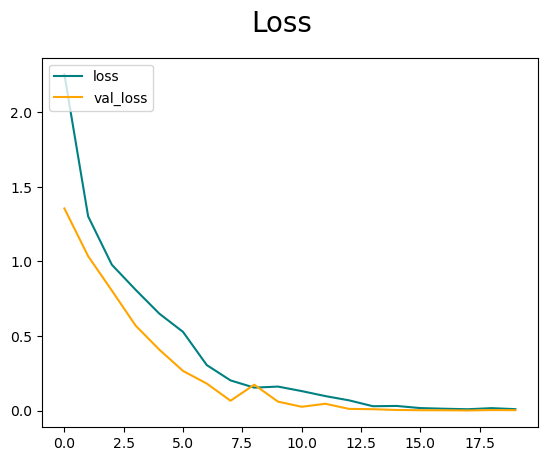

In [11]:
# Plot the training history
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


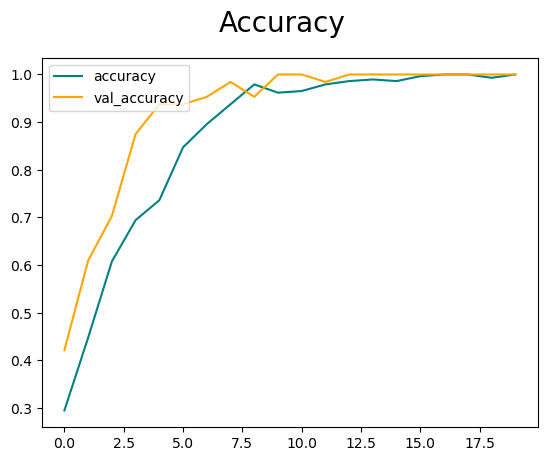

In [12]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [13]:
# Evaluate the model
from keras.metrics import Precision, Recall, CategoricalAccuracy

In [14]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [15]:
for batch in test:
    X, y = batch
    yhat = model.predict(X)
    yhat = tf.argmax(yhat, axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


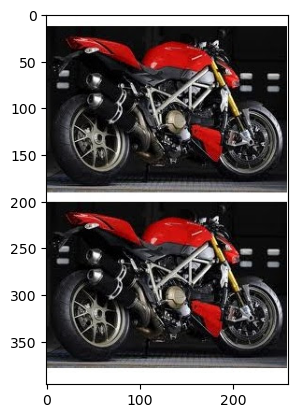

In [16]:
# Predicting on a new image
img_path = r'E:\Test_car_detect\Dataset\Motorcycle\Image_100.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

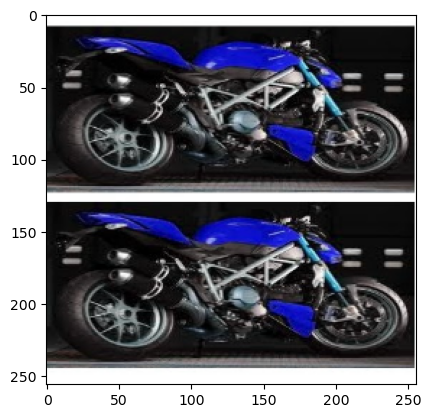

In [17]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [18]:
yhat = model.predict(np.expand_dims(resize / 255, 0))
predicted_class = np.argmax(yhat, axis=1)[0]
class_names = ['Bus', 'Car', 'Motorcycle', 'Truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


In [19]:
print(f'Predicted class is {class_names[predicted_class]}')

Predicted class is Motorcycle


Save model

In [20]:
import os
from keras import models
model.save(os.path.join('models','car_detect.h5'))